# Tomografía de Resistividad Eléctrica

In [1]:
import pygimli as pg 
import matplotlib.pyplot as plt
from pygimli.physics import ert
import pygimli.meshtools as mt
import numpy as np

# Modelo directo

Define la geometría para el dominio modelado. 

In [11]:
world = mt.createWorld(start=[-50, 0], end=[50, -50], layers=[-6, -15], worldMarker=False)

In [12]:
block = mt.createCircle(pos=[-5, -11], radius=[4, 2], marker = 4, boundaryMarker=10)

In [13]:
poly = mt.createPolygon([(1, -4), (2, -1.5), (4, -2), (5, -2), 
                         (8, -3), (5, -3.5), (3, -4.5)], 
                        isClosed=True, marker=5, addNodes=3, 
                        interpolate="spline")

In [14]:
geom = world + block + poly

Mostrar geometría con pg.show()

(<Axes: >, None)

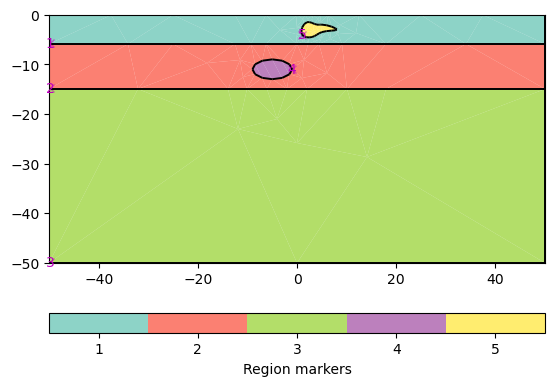

In [15]:
pg.show(geom)

## Generar datos sintéticos

In [49]:
scheme = ert.createData(elecs=np.linspace(start=-15, stop=15, num=32), schemeName='slm')

In [50]:
for p in scheme.sensors():
    geom.createNode(p)
    geom.createNode(p - [0, 0.1])

mesh = mt.createMesh(geom, quality=34)

rhomap = [[1, 100.],
          [2, 250.],
          [3, 400.],
          [4, 1.],
          [5, 10.]]

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x2337dc19700>)

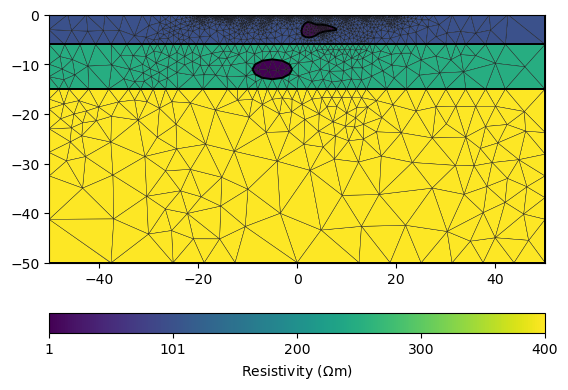

In [51]:
pg.show(mesh, data=rhomap, label=pg.unit('res'), showMesh=True)

## Simulación de adquisición

**Generación de datos sintéticos del modelo**

In [52]:
data = ert.simulate(mesh, scheme=scheme, res=rhomap, noiselevel=1, seed=1337, noiseAbs=1e-6)

pg.info(np.linalg.norm(data['err']), np.linalg.norm(data['rhoa']))
pg.info('Simulated data', data)
pg.info('The data contains:', data.dataMap().keys())

pg.info('Simulated rhoa (min/max)', min(data['rhoa']), max(data['rhoa']))
pg.info('Selected data noise %(min/max)', min(data['err'])*100, max(data['err'])*100)

06/02/24 - 21:35:03 - pyGIMLi - INFO - 0.0 1400.2394614937218
06/02/24 - 21:35:03 - pyGIMLi - INFO - Simulated data Data: Sensors: 32 data: 225, nonzero entries: ['a', 'b', 'k', 'm', 'n', 'rhoa', 'valid']
06/02/24 - 21:35:03 - pyGIMLi - INFO - The data contains: ['a', 'b', 'err', 'i', 'ip', 'iperr', 'k', 'm', 'n', 'r', 'rhoa', 'u', 'valid']
06/02/24 - 21:35:03 - pyGIMLi - INFO - Simulated rhoa (min/max) 53.793819641800624 137.0044890865557
06/02/24 - 21:35:03 - pyGIMLi - INFO - Selected data noise %(min/max) 0.0 0.0


In [53]:
data.remove(data['rhoa'] < 0)

In [54]:
data.save('datos_tre/synth_data.dat')

1

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x2337dd22670>)

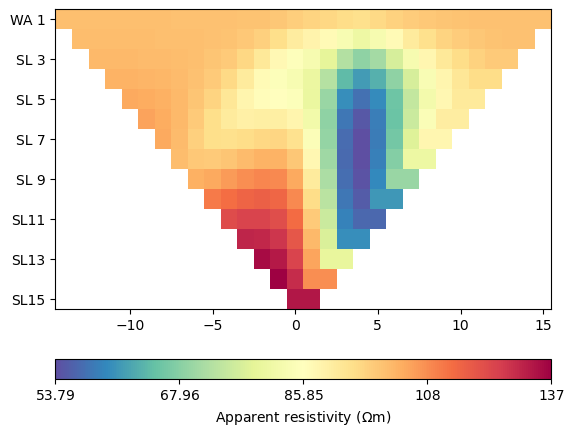

In [55]:
ert.showData(data)

In [56]:
data["k"]=ert.geometricFactors(data)
data["err"]=ert.estimateError(data, relativeError=0.03, absoluteError=50e-6)

In [57]:
mgr = ert.ERTManager(data)

In [58]:
inv = mgr.invert(verbose=True)

06/02/24 - 21:35:03 - pyGIMLi - INFO - Found 2 regions.
06/02/24 - 21:35:03 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
06/02/24 - 21:35:03 - pyGIMLi - INFO - Found 2 regions.
06/02/24 - 21:35:03 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
06/02/24 - 21:35:03 - pyGIMLi - INFO - Creating forward mesh from region infos.
06/02/24 - 21:35:03 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
06/02/24 - 21:35:03 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 1452 Cells: 2708 Boundaries: 2128
06/02/24 - 21:35:03 - pyGIMLi - INFO - Use median(data values)=96.18332708683707
06/02/24 - 21:35:03 - pyGIMLi - INFO - Created startmodel from forward operator: 453, min/max=96.183327/96.183327
06/02/24 - 21:35:03 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000233762FE130>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002337DCF2860>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x00000233763C2A40>
min/max (data): 53.79/137
min/max (error): 3%/3%
min/max (start model): 96.18/96.18
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =   52.10
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    3.13 (dPhi = 92.52%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    0.38 (dPhi = 71.67%) lam: 20.0


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.38)                   #
################################################################################


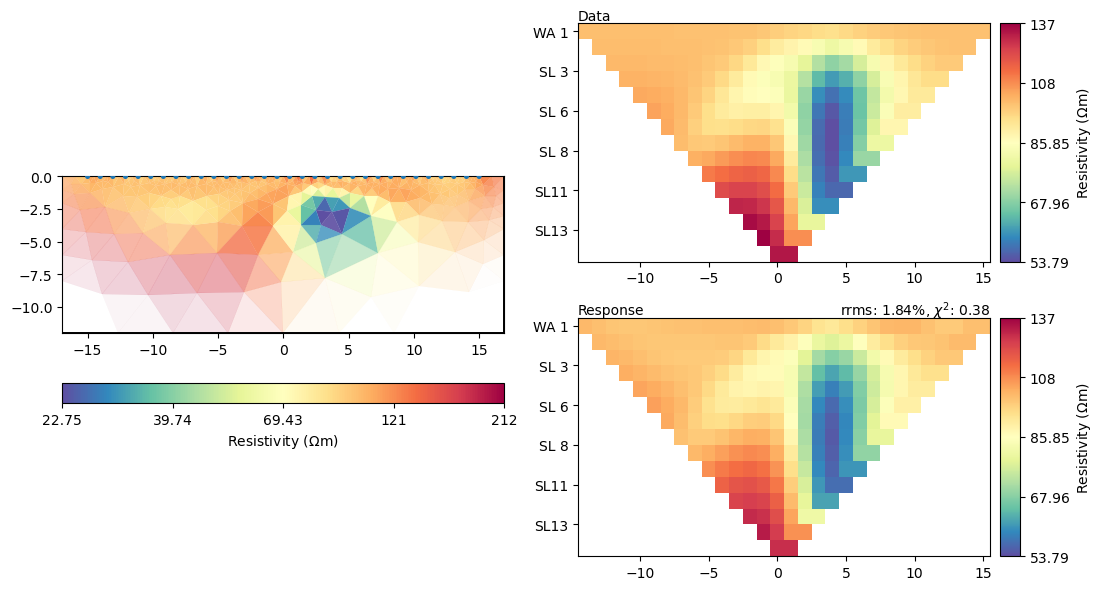

In [59]:
mgr.showResultAndFit()
plt.show()